In [27]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\gouda\OneDrive\Desktop\train.csv")
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
# checking rows , columns , data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
#checking missing values in each column 
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
#checking duplicates 
df.duplicated().sum()

np.int64(0)

In [12]:
df['Order Date'].head()

0    08/11/2017
1    08/11/2017
2    12/06/2017
3    11/10/2016
4    11/10/2016
Name: Order Date, dtype: object

In [13]:
# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Convert Ship Date also
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

In [14]:
df['Month'] = df['Order Date'].dt.month

# Extract Year
df["Year"] = df["Order Date"].dt.year

In [15]:
# Statistical summary of numeric columns
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Month,Year
count,9800.000000,9800,9800,9789.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059,7.818469,2016.724184
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,2015.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,5.000000,2016.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000,9.000000,2017.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,11.000000,2018.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,12.000000,2018.000000
std,2829.160653,NaN,NaN,32041.223413,626.651875,3.281905,1.123984


In [16]:
# total sales 
total_sales = df['Sales'].sum()
print("Total Sales :" , total_sales)

Total Sales : 2261536.7827000003


In [17]:
#Top 5 Customers 
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(5)
print( "Top 5 Customers Are :" , top_customers)

Top 5 Customers Are : Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


In [18]:
category_sales = df.groupby("Category")["Sales"].sum()
print(category_sales)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


In [19]:
region_sales = df.groupby("Region")["Sales"].sum()
print(region_sales)

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [20]:
monthly_sales = df.groupby("Month")["Sales"].sum()
print(monthly_sales)

Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


In [21]:
df["Delivery Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

In [22]:
# average delivery time 
avg_delivery = df["Delivery Days"].mean()
print("Average Delivery Days:", avg_delivery)

Average Delivery Days: 3.9611224489795918


In [23]:
ship_mode_delay = df.groupby("Ship Mode")["Delivery Days"].mean()
print(ship_mode_delay)

Ship Mode
First Class       2.179214
Same Day          0.044610
Second Class      3.249211
Standard Class    5.008363
Name: Delivery Days, dtype: float64


In [25]:
# top 10 product sales 
top_10_product = df.groupby('Product Name')['Sales'].sum().sort_values( ascending = False).head(10)
print( "Top 10 Sold Products Are :" , top_10_product)

Top 10 Sold Products Are : Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


Text(0, 0.5, 'Sales')

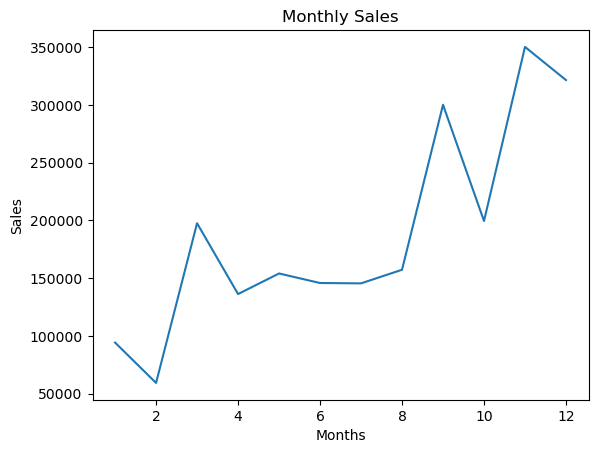

In [29]:
#MONTHLY SALES TREND 
monthly_sales.plot()
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Sales")

Observation:
Sales peak in Month 8 and drop in Month 10.

Insight:
There is clear seasonality in sales. Inventory and marketing planning should align with peak months.

Text(0, 0.5, 'Sales')

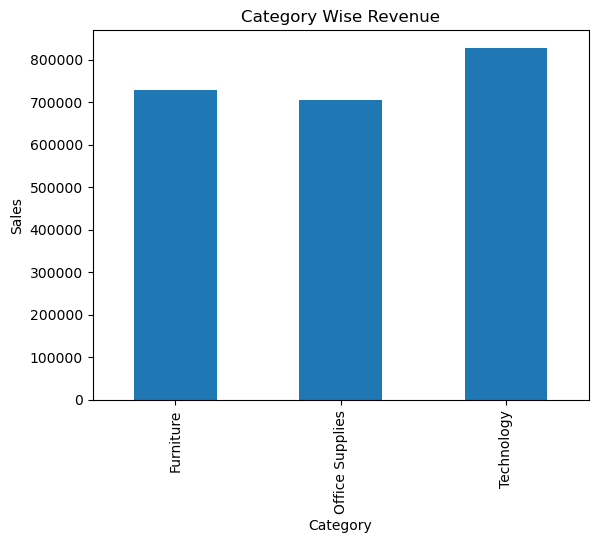

In [38]:
# CATEGORY SALES
category_sales.plot( kind ="bar")
plt.title("Category Wise Revenue")
plt.xlabel("Category")
plt.ylabel("Sales")

**Observation:**  
Technology category generated the highest sales.

**Insight:**  
This indicates strong demand in the technology segment.

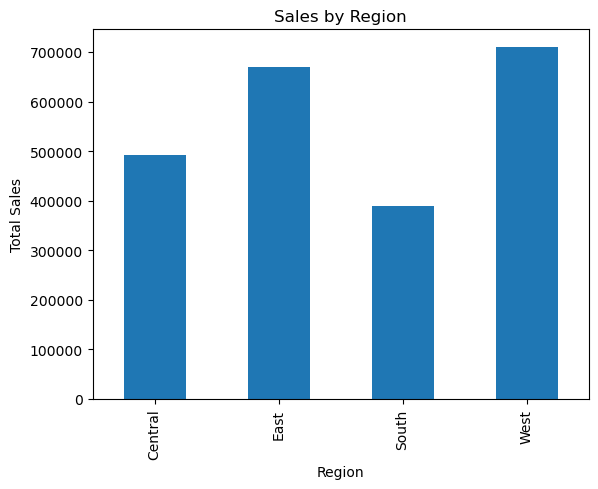

In [34]:
#REGION WISE SALES
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

Observation:
The West region contributes the highest sales.

Insight:
The company has strong market penetration in this region. Expansion strategies can focus on underperforming regions.

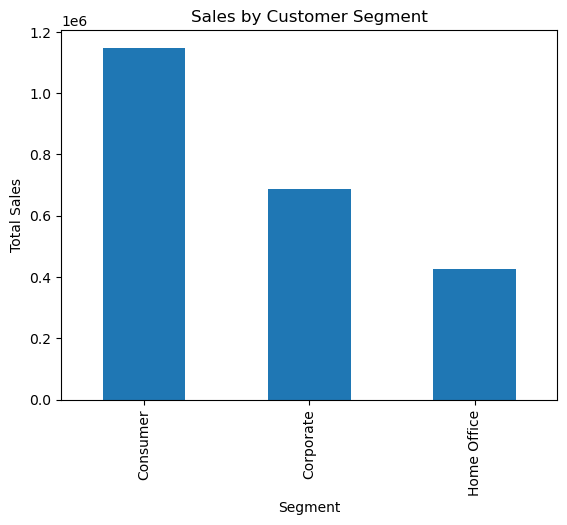

In [35]:
#Segment Analysis (Bar Chart)
segment_sales = df.groupby("Segment")["Sales"].sum()

segment_sales.plot(kind="bar")
plt.title("Sales by Customer Segment")
plt.ylabel("Total Sales")
plt.show()

Observation:
The Consumer segment generates the highest revenue.

Insight:
The business is heavily B2C driven. Marketing campaigns should continue targeting retail consumers while exploring growth in Corporate segment.

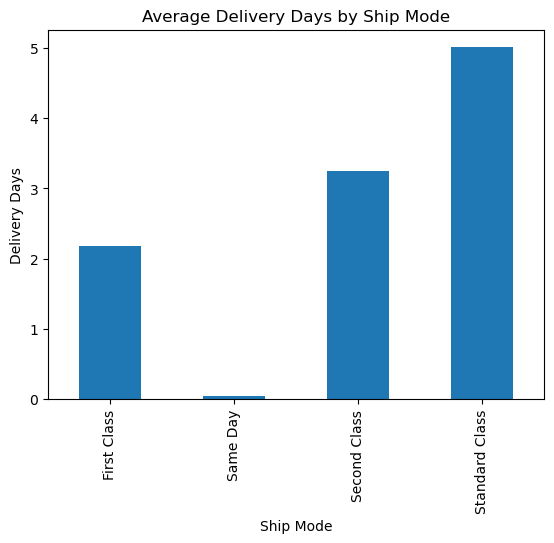

In [36]:
#Shipping Mode vs Delivery Days (Bar Chart)
ship_mode_delay.plot(kind="bar")
plt.title("Average Delivery Days by Ship Mode")
plt.ylabel("Delivery Days")
plt.show()

Observation:
Standard Class shipping has the highest average delivery time.

Insight:
Improving logistics efficiency in standard shipping could enhance customer satisfaction.

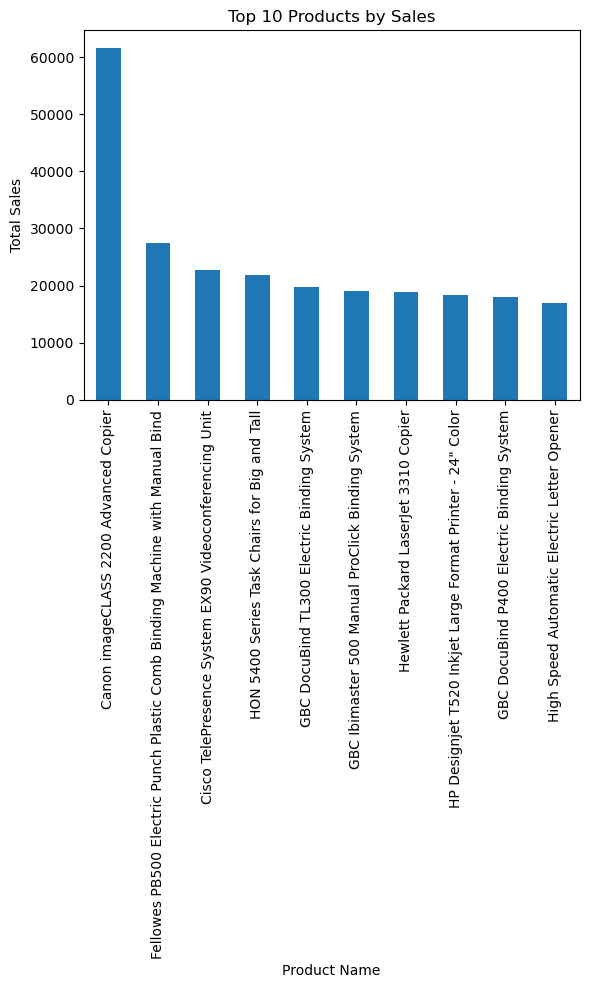

In [37]:
#Top 10 Products
top_10_product.plot(kind="bar")
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.show()

Observation:
Top 10 products contribute a significant portion of total sales.

Insight:
Revenue is concentrated among a limited set of products. These should be protected and promoted strategically.

This analysis explored sales performance, customer segmentation, regional trends, product concentration, and shipping efficiency using Python (Pandas, Matplotlib) and SQL. The findings highlight strong revenue concentration in specific categories and regions, seasonal sales patterns, and opportunities for operational improvement in shipping modes.
